In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tf.config.list_physical_devices("GPU")

[]

# Introduction to neural network classification with TensorFlow

## Creating data to view and fit

In [3]:
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [4]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Let's visualize our data!

In [6]:
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


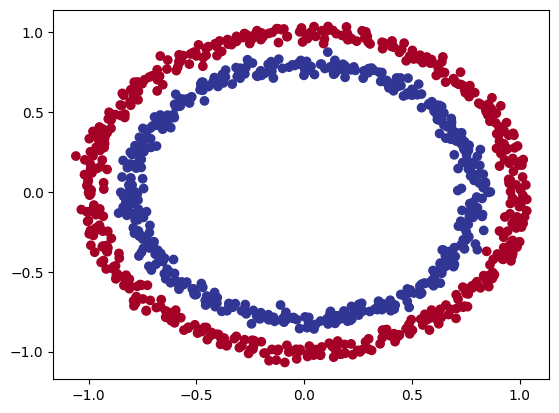

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
len(X), len(y)

(1000, 1000)

In [10]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(2)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=100, verbose=1)

model.evaluate(X_test, y_test)

Epoch 1/100
25/25 [==============================] - 3s 18ms/step - loss: 4.4657 - accuracy: 0.5050
Epoch 2/100
25/25 [==============================] - 0s 8ms/step - loss: 3.0327 - accuracy: 0.5138
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 2.4461 - accuracy: 0.5013
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 2.2773 - accuracy: 0.5063
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 2.1975 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 2.0766 - accuracy: 0.5038
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 1.8622 - accuracy: 0.5025
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 1.4198 - accuracy: 0.5050
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7781 - accuracy: 0.5025
Epoch 10/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7349 - accuracy: 0.4888
Epoch 11

[0.6945645213127136, 0.4950000047683716]

In [12]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 4.3684 - accuracy: 0.4680
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.3471 - accuracy: 0.4690
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 4.2803 - accuracy: 0.4690
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 4.2396 - accuracy: 0.4710
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 4.2293 - accuracy: 0.4720


In [13]:
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.7287 - accuracy: 0.4840


[0.7286555767059326, 0.48399999737739563]

In [14]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X, y, epochs=100, verbose=0)

In [15]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

## Improve our model

In [16]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

In [17]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X, y, epochs=100, verbose=0)

In [18]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5080


[0.6972432732582092, 0.5080000162124634]

In [19]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [45]:
def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 4ms/step
doing binary classification


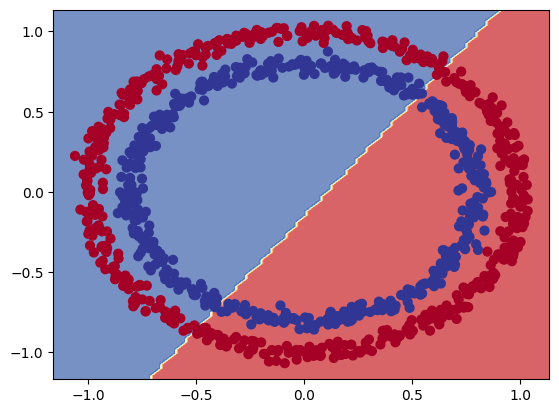

In [46]:
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [51]:
tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [52]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_reg_train, axis=1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 577.7749 - mae: 577.7749
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 469.7311 - mae: 469.7311
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 367.3936 - mae: 367.3936
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 262.8589 - mae: 262.8589
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 155.0908 - mae: 155.0908
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 54.6536 - mae: 54.6536
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 75.5353 - mae: 75.5353
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 77.8972 - mae: 77.8972
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1068 - mae: 53.1068
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 49.0000 - mae: 49.0000
Epoch 11/100
5/5 [==============================]

2/2 [==============================] - 0s 6ms/step


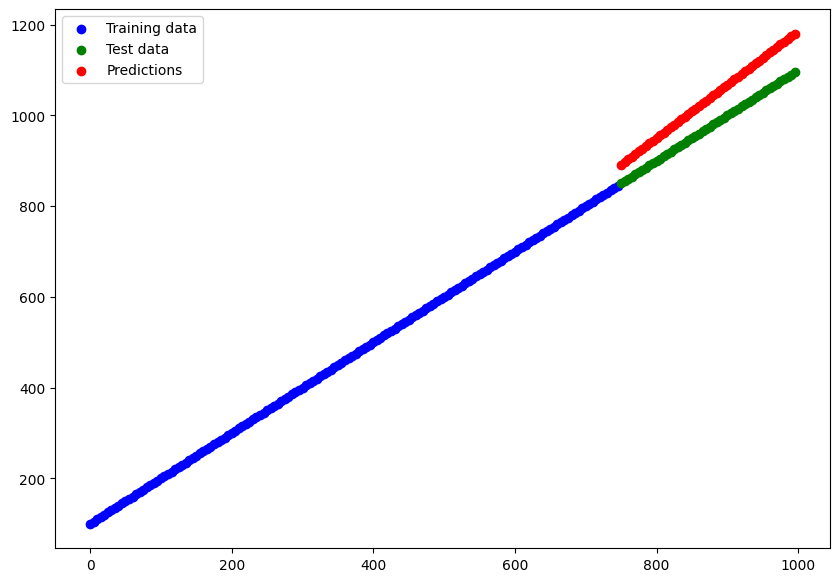

In [57]:
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();